In [20]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('../data/tv_export_data.csv')

# Calculate quartiles
quartiles = df['cast_popularity'].describe()

print(f"Q0: {df['cast_popularity'].min()}")
print(f"Q1: {quartiles['25%']}")
print(f"Q2: {quartiles['50%']}")
print(f"Q3: {quartiles['75%']}")
print(f"Q4: {df['cast_popularity'].max()}")



Q0: 0.6
Q1: 1.474
Q2: 3.254
Q3: 7.54
Q4: 698.9


In [21]:
import pandas as pd
import statsmodels.formula.api as smf

# Load data
df = pd.read_csv('../data/tv_export_data.csv')

# First, convert 'detail_gender' into a binary variable 'is_male'
df['is_male'] = df['detail_gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Conduct the regression
model = smf.ols(formula='vote_average ~ season_number + episode_count + cast_popularity + is_male', data=df)
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:42:02   Log-Likelihood:            -7.4216e+06
No. Observations:             1197854   AIC:                         1.484e+07
Df Residuals:                 1197849   BIC:                         1.484e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          99.6766      0.214    4

In [22]:
# import pandas as pd

# # Assume df is your DataFrame
# df = pd.read_csv("../data/tv_export_data.csv")

# # Create new gender_ethnicity column
# df['gender_ethnicity'] = df['profile_race'] + "_" + df['profile_gender']

# # Calculate counts for each gender_ethnicity group
# counts = df['gender_ethnicity'].value_counts()

# # Calculate the ratios
# ratios = {}
# for race in df['profile_race'].unique():
#     male_key = race + "_Male"
#     female_key = race + "_Female"
    
#     # Make sure the keys exist in the counts series to avoid KeyError
#     if male_key in counts and female_key in counts:
#         ratios[race] = counts[female_key] / counts[male_key]
    
# # Print the ratios
# for race, ratio in ratios.items():
#     print(f"Ratio for {race}: {ratio}")


In [23]:
import pandas as pd

# Assume df is your DataFrame
df = pd.read_csv("../data/tv_export_data.csv")

# Replace NaN values with 'Unknown'
df['profile_race'] = df['profile_race'].fillna('Unknown')
df['profile_gender'] = df['profile_gender'].fillna('Unknown')

# Create new gender_ethnicity column
df['gender_ethnicity'] = df['profile_race'] + "_" + df['profile_gender']

# Calculate counts for each gender_ethnicity group
counts = df['gender_ethnicity'].value_counts()

# Calculate the ratios
ratios = {}
for race in df['profile_race'].unique():
    male_key = race + "_Male"
    female_key = race + "_Female"
    
    # Make sure the keys exist in the counts series to avoid KeyError
    if male_key in counts and female_key in counts:
        ratios[race] = counts[female_key] / counts[male_key]
    
# Print the ratios
for race, ratio in ratios.items():
    print(f"Ratio for {race}: {ratio}")


Ratio for white: 0.4728773530616849
Ratio for latino hispanic: 0.344666370764906
Ratio for black: 0.2596446787389176
Ratio for middle eastern: 0.031980230403023585
Ratio for asian: 0.45952525867315885
Ratio for indian: 0.26078334159643035
Ratio for _total_: 0.4018999924121709


In [24]:
# Convert the season_air_date to datetime and extract the year
df['year'] = pd.to_datetime(df['season_air_date']).dt.year

# Create lists to store the year, ethnic_group and ratio data
years = []
ethnic_groups = []
ratios = []

# For each year and each ethnic group, calculate the female to male ratio
for year in df['year'].unique():
    for ethnic_group in df['profile_race'].unique():
        male_count = len(df[(df['year'] == year) & (df['profile_race'] == ethnic_group) & (df['profile_gender'] == 'Male')])
        female_count = len(df[(df['year'] == year) & (df['profile_race'] == ethnic_group) & (df['profile_gender'] == 'Female')])
        
        # Avoid dividing by zero
        if male_count != 0:
            ratio = female_count / male_count
        else:
            ratio = None
        
        # Append the data to the lists
        years.append(year)
        ethnic_groups.append(ethnic_group)
        ratios.append(ratio)

# Create the DataFrame
df_ratios = pd.DataFrame({'year': years, 'ethnic_group': ethnic_groups, 'ratio': ratios})


In [25]:
df_ratios.dropna(inplace=True)
df_ratios

,year,ethnic_group,ratio
0,1960.0,white,0.381960
1,1960.0,latino hispanic,0.047904
2,1960.0,black,0.071429
3,1960.0,middle eastern,0.000000
5,1960.0,asian,0.111111
...,...,...,...
514,2002.0,black,0.243995
515,2002.0,middle eastern,0.029126
517,2002.0,asian,0.472019
518,2002.0,indian,0.242424


In [26]:
import statsmodels.formula.api as smf

# List of all ethnic groups in your data
ethnic_groups = df_ratios['ethnic_group'].unique()

# Dictionary to store the results for each ethnic group
results = {}

# Loop through each ethnic group and run an OLS regression
for group in ethnic_groups:
    # Filter data for the current ethnic group
    df_group = df_ratios[df_ratios['ethnic_group'] == group]
    
    # Conduct the regression
    model = smf.ols(formula='ratio ~ year', data=df_group)
    result = model.fit()
    
    # Store the results
    results[group] = result

# Now you can access the results for each ethnic group
for group, result in results.items():
    print(f"Results for {group}:")
    print(result.summary())
    print("\n")


Results for white:
                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.67e-23
Time:                        22:46:09   Log-Likelihood:                 137.02
No. Observations:                  64   AIC:                            -270.0
Df Residuals:                      62   BIC:                            -265.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6747      0.389 

In [27]:
import statsmodels.formula.api as smf

# Pivot the df_ratios to get a separate column for each ethnic group's ratio
df_ratios_pivot = df_ratios.pivot(index='year', columns='ethnic_group', values='ratio')

# Fill NaN values with 0
df_ratios_pivot = df_ratios_pivot.fillna(0)

# Replace spaces in column names with underscores
df_ratios_pivot.columns = df_ratios_pivot.columns.str.replace(' ', '_')

# Now try the regression again
formula = '_total_ ~ ' + ' + '.join([col for col in df_ratios_pivot.columns if col != '_total_'])
model = smf.ols(formula=formula, data=df_ratios_pivot)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                _total_   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           8.28e-66
Time:                        22:46:09   Log-Likelihood:                 248.06
No. Observations:                  64   AIC:                            -482.1
Df Residuals:                      57   BIC:                            -467.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0066      0.011     

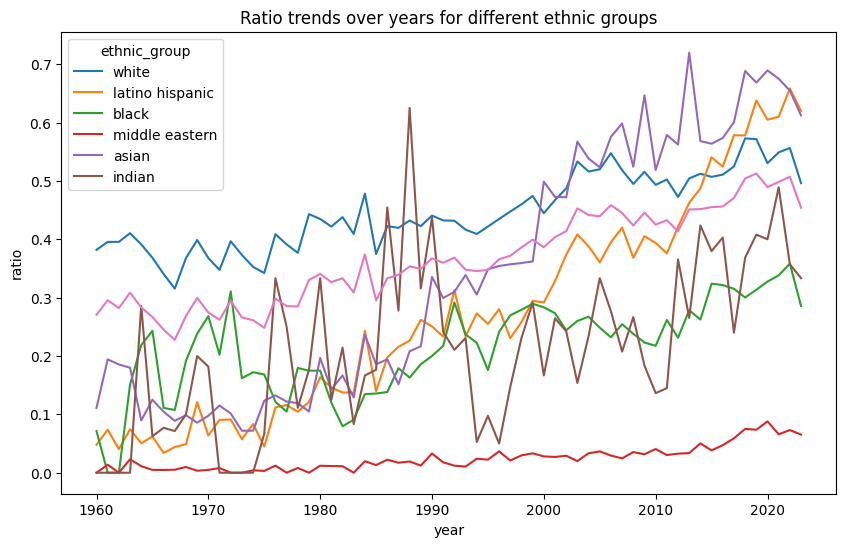

In [28]:
import statsmodels.formula.api as smf

ethnic_groups = df_ratios['ethnic_group'].unique()
results = {}

for group in ethnic_groups:
    df_temp = df_ratios[df_ratios['ethnic_group'] == group]
    model = smf.ols(formula='ratio ~ year', data=df_temp).fit()
    results[group] = model.params

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results).T

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ratios, x='year', y='ratio', hue='ethnic_group')
plt.title('Ratio trends over years for different ethnic groups')
plt.show()


In [29]:
import statsmodels.formula.api as smf

ethnic_groups = df_ratios['ethnic_group'].unique()
results = {}

for group in ethnic_groups:
    df_temp = df_ratios[df_ratios['ethnic_group'] == group]
    model = smf.ols(formula='ratio ~ year', data=df_temp).fit()
    results[group] = model.params['year']

# Convert dictionary to Series
results_series = pd.Series(results)


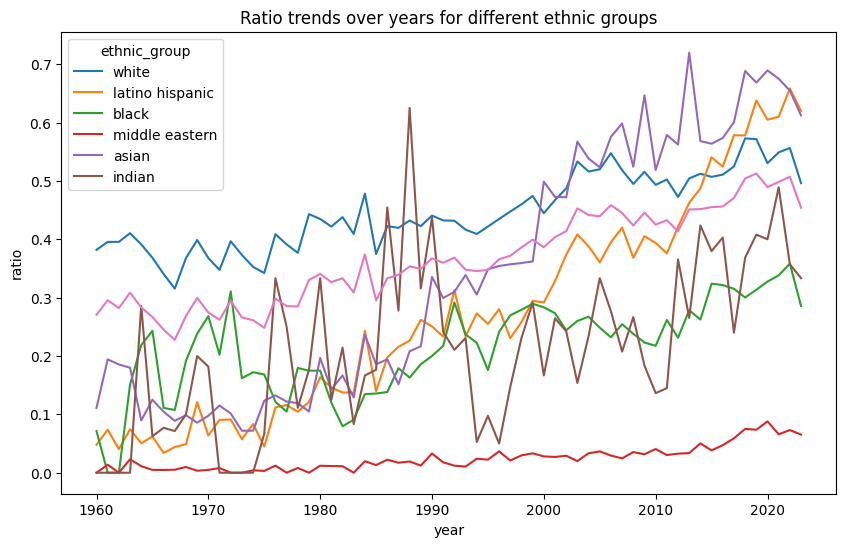

In [30]:
import statsmodels.formula.api as smf

ethnic_groups = df_ratios['ethnic_group'].unique()
results = {}

for group in ethnic_groups:
    df_temp = df_ratios[df_ratios['ethnic_group'] == group]
    model = smf.ols(formula='ratio ~ year', data=df_temp).fit()
    results[group] = model.params

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results).T

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ratios, x='year', y='ratio', hue='ethnic_group')
plt.title('Ratio trends over years for different ethnic groups')
plt.show()
